In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
dt.date(2017, 8, 23) - dt.timedelta(days=365)


datetime.date(2016, 8, 23)

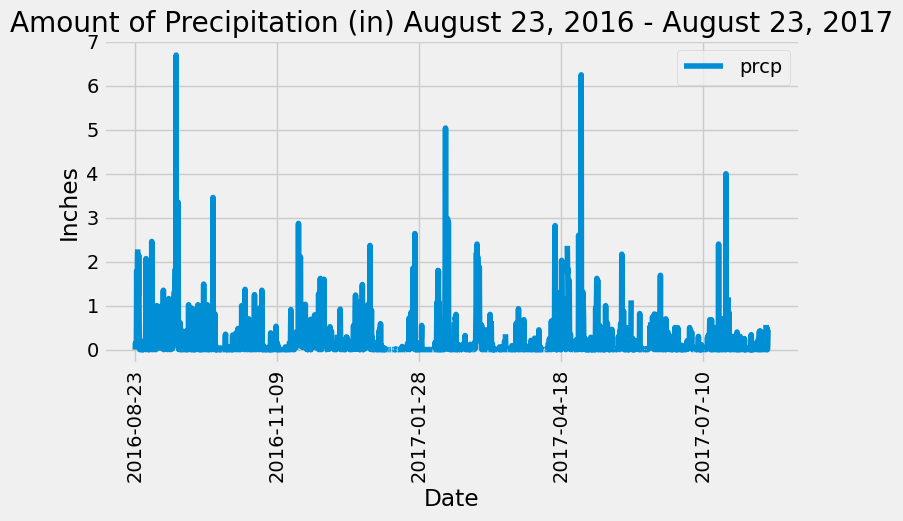

In [12]:
# Perform a query to retrieve the data and precipitation scores
data_precip = [Measurement.date, Measurement.prcp]
year_precip = session.query(*data_precip).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_precip, columns=['date', 'prcp'])
df = df.set_index('date')

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(figsize=(8, 4))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 'vertical')
plt.title("Amount of Precipitation (in) August 23, 2016 - August 23, 2017")

plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.dropna().describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
#session.query(Station).count()
total_stations = session.query(Measurement.station).distinct().count()
print(total_stations)

9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, 
   func.count(Measurement.station)).\
   group_by(Measurement.station).\
   order_by(func.count(Measurement.station).desc()).all()
              

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all();
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all();
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all();
print(f"Average temp = {average_temp}")
print(f"Highest temp = {highest_temp}")
print(f"Lowest temp = {lowest_temp}")

Average temp = [(71.66378066378067,)]
Highest temp = [(85.0,)]
Lowest temp = [(54.0,)]


In [16]:
# Find the most recent date for the USC00519281 station record.
session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

('2017-08-18',)

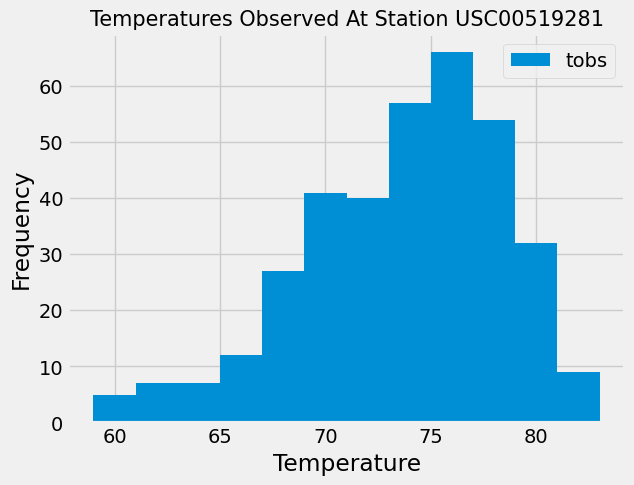

In [19]:
#Filter data by the station that has the greatest number of observations
#and the last 12 months of temperature observed
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-18').all();

# Plot the results as a histogram
df = pd.DataFrame(station_data)
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temperatures Observed At Station USC00519281', fontsize=15)
plt.show()


# Close session

In [21]:
# Close Session
session.close()